In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split

import xgboost as xgb
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('data_music.csv')
print(df)
df = df.drop(df.index[-1])
df = df[df['gatunek_muzyczny'] != 'CLASSICAL']
df = df[df['gatunek_muzyczny'] != 'RAP']

                  tytuły       0.0  14.700000000000417  29.400000000000837  \
0     CLASSICAL (10).csv  0.018598            0.019710            0.026129   
1     CLASSICAL (11).csv  0.020094            0.021792            0.030528   
2     CLASSICAL (12).csv  0.023951            0.027250            0.042674   
3     CLASSICAL (13).csv  0.017387            0.019881            0.031651   
4     CLASSICAL (14).csv  0.024191            0.025585            0.031639   
...                  ...       ...                 ...                 ...   
4661        RAP (96).csv  0.064476            0.072189            0.088634   
4662        RAP (97).csv  0.070935            0.072482            0.090877   
4663        RAP (98).csv  0.055050            0.059856            0.069300   
4664        RAP (99).csv  0.050170            0.053780            0.062213   
4665             RAP.csv  0.102308            0.069869            0.085094   

      44.09999999999917  58.80000000000167      73.5  88.199999

In [5]:
# git
# df.describe()
# print(df.columns)
df_y = df.iloc[:, -1]

print(df_y)

df_x = df.iloc[:, :-1]

df_x = df_x.drop(df_x.columns[0], axis=1)

# print(df_x.head(20))

572     COUNTRY
573     COUNTRY
574     COUNTRY
575     COUNTRY
576     COUNTRY
         ...   
4284        POP
4285        POP
4286        POP
4287        POP
4288        POP
Name: gatunek_muzyczny, Length: 3717, dtype: object


In [6]:

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_y)
print(y_encoded.max())
print(y_encoded)
df_y4 = y_encoded[y_encoded == 4]
print(len(df_y4))

print(df_y[df_y == "HIPHOP"])
print(df_y[df_y == "COUNTRY"])
print(df_y[df_y == "JAZZ"])
print(df_y[df_y == "POP"])

# hiphop - 2389
# country - 572





3
[0 0 0 ... 3 3 3]
0
1555    HIPHOP
1556    HIPHOP
1557    HIPHOP
1558    HIPHOP
1559    HIPHOP
         ...  
2385    HIPHOP
2386    HIPHOP
2387    HIPHOP
2388    HIPHOP
2389    HIPHOP
Name: gatunek_muzyczny, Length: 835, dtype: object
572     COUNTRY
573     COUNTRY
574     COUNTRY
575     COUNTRY
576     COUNTRY
         ...   
1550    COUNTRY
1551    COUNTRY
1552    COUNTRY
1553    COUNTRY
1554    COUNTRY
Name: gatunek_muzyczny, Length: 983, dtype: object
2390    JAZZ
2391    JAZZ
2392    JAZZ
2393    JAZZ
2394    JAZZ
        ... 
3425    JAZZ
3426    JAZZ
3427    JAZZ
3428    JAZZ
3429    JAZZ
Name: gatunek_muzyczny, Length: 1040, dtype: object
3430    POP
3431    POP
3432    POP
3433    POP
3434    POP
       ... 
4284    POP
4285    POP
4286    POP
4287    POP
4288    POP
Name: gatunek_muzyczny, Length: 859, dtype: object


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x, y_encoded, test_size=0.15, random_state=42)



In [9]:
# regresja logitowa
model = LogisticRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.6720430107526881


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# drzewo decyzyjne
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.5716845878136201


In [10]:
# drzewo losowe
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6935483870967742


In [ ]:
# działa za długo >30 min
# gradient boost
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

KeyboardInterrupt: 

In [11]:
# k neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)


model.fit(X_train, y_train, eval_metric=["logloss", "error"], eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6505376344086021


In [ ]:
# model = CatBoostClassifier()
# model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

# y_val_pred = model.predict(X_val)

# accuracy = accuracy_score(y_val, y_val_pred)
# print("Accuracy:", accuracy)

In [18]:
# model = xgb.XGBClassifier()
# eval_set = [(X_train, y_train), (X_test, y_test)]
# model.fit(X_train, y_train)

# y_val_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_val_pred)
# print("Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoostError: [12:57:13] /workspace/src/metric/elementwise_metric.cu:346: Check failed: preds.Size() == info.labels.Size() (12636 vs. 3159) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x927f4a) [0x7d96fd5b5f4a]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x995e40) [0x7d96fd623e40]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4efea5) [0x7d96fd17dea5]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4f0168) [0x7d96fd17e168]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c8ab0) [0x7d96fd156ab0]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x2f6) [0x7d96fcdf8bb6]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7d9765d83e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7d9765d80493]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7d9765da93e9]



In [49]:
model = xgb.XGBClassifier(eval_metric=["mlogloss", "merror"])

# Trenowanie modelu z monitorowaniem zestawów treningowego i testowego
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Przewidywanie na zbiorze testowym
y_test_pred = model.predict(X_test)

# Ocena modelu (np. accuracy)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Uzyskanie wyników ewaluacji
results = model.evals_result()

# Wyświetlanie krzywej uczenia się
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)



[0]	validation_0-mlogloss:1.13988	validation_0-merror:0.24913	validation_1-mlogloss:1.21540	validation_1-merror:0.39964
[1]	validation_0-mlogloss:0.97886	validation_0-merror:0.20450	validation_1-mlogloss:1.10668	validation_1-merror:0.37634
[2]	validation_0-mlogloss:0.85862	validation_0-merror:0.18740	validation_1-mlogloss:1.03442	validation_1-merror:0.37634
[3]	validation_0-mlogloss:0.76047	validation_0-merror:0.16936	validation_1-mlogloss:0.98273	validation_1-merror:0.36380
[4]	validation_0-mlogloss:0.68252	validation_0-merror:0.15543	validation_1-mlogloss:0.93836	validation_1-merror:0.34050
[5]	validation_0-mlogloss:0.61294	validation_0-merror:0.14308	validation_1-mlogloss:0.90633	validation_1-merror:0.34409
[6]	validation_0-mlogloss:0.56164	validation_0-merror:0.13454	validation_1-mlogloss:0.88354	validation_1-merror:0.32258
[7]	validation_0-mlogloss:0.52181	validation_0-merror:0.12979	validation_1-mlogloss:0.85766	validation_1-merror:0.33154
[8]	validation_0-mlogloss:0.48084	valida

Text(0.5, 1.0, 'XGBoost Log Loss')

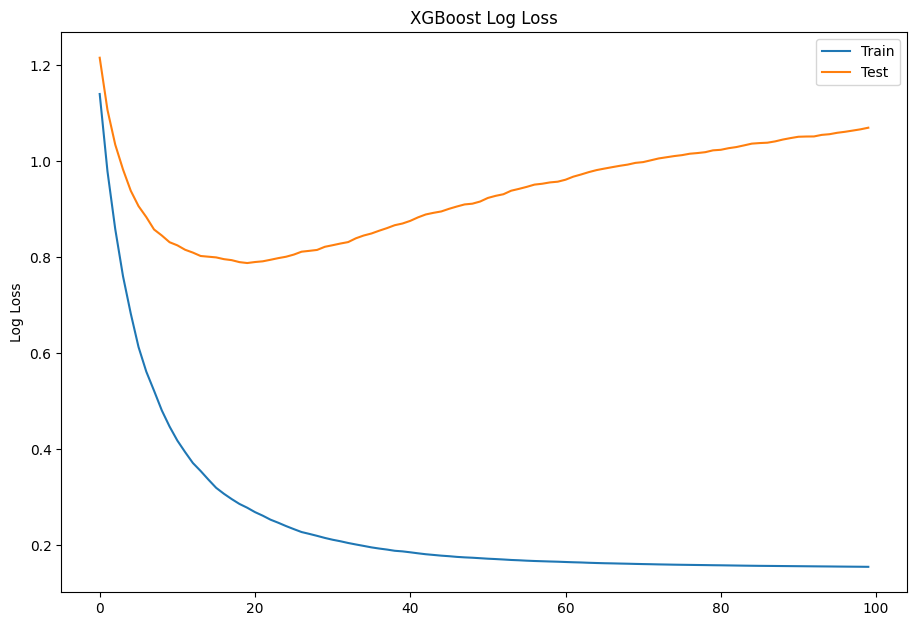

In [44]:
# Log loss
plt.figure(figsize=(24, 16))
plt.subplot(2, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

Text(0.5, 1.0, 'XGBoost Classification Error')

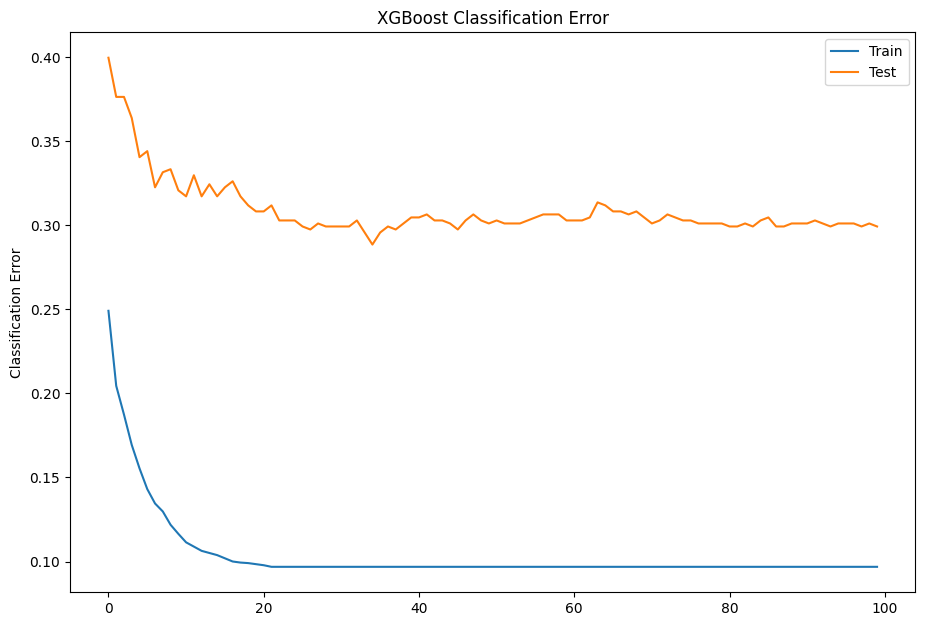

In [43]:
# Classification error
plt.figure(figsize=(24, 16))
plt.subplot(2, 2, 2)
plt.plot(x_axis, results['validation_0']['merror'], label='Train')
plt.plot(x_axis, results['validation_1']['merror'], label='Test')
plt.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')

Text(0.5, 1.0, 'Confusion Matrix')

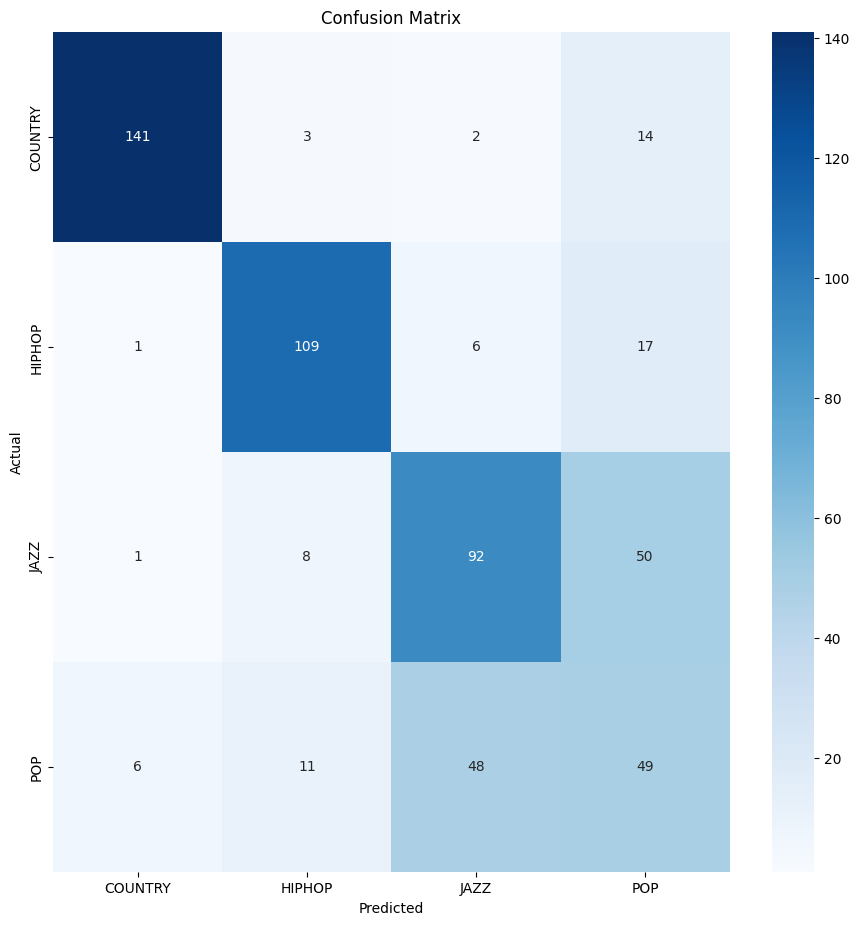

In [42]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(24, 24))
plt.subplot(2, 2, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

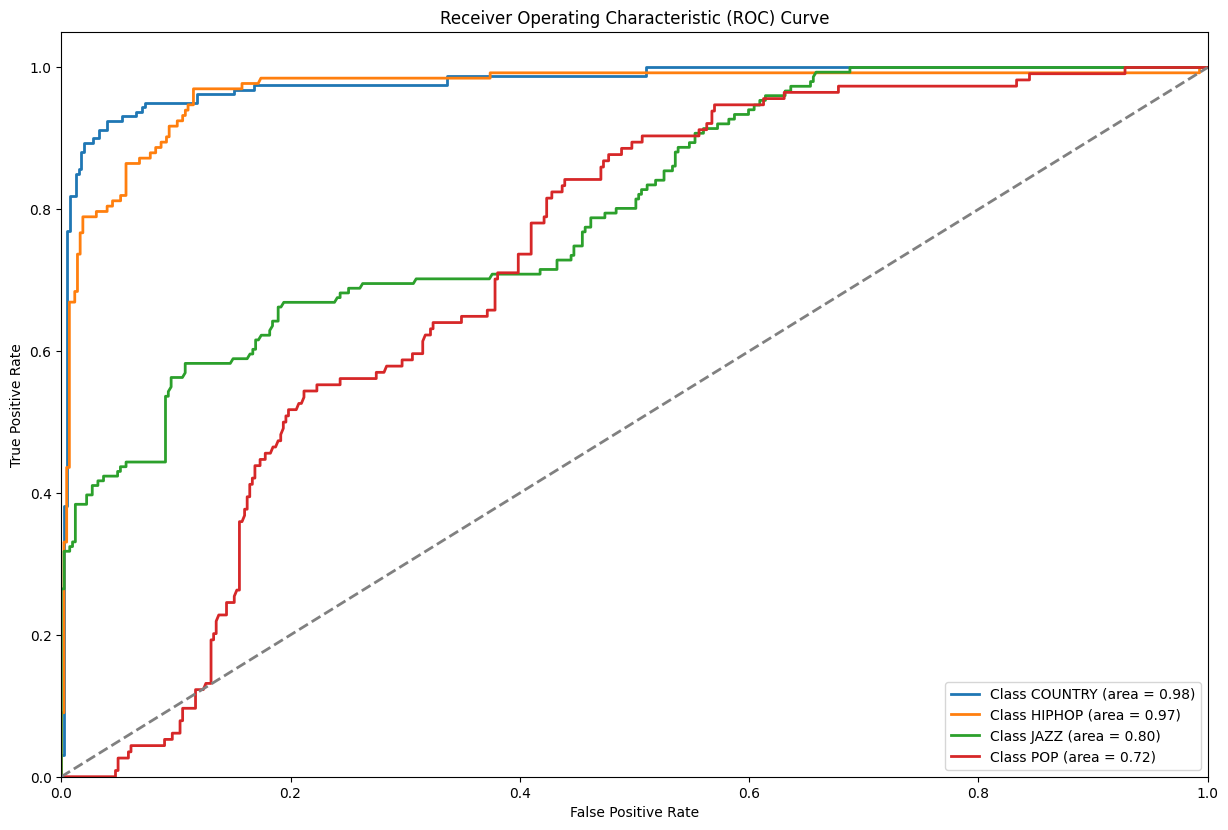

In [45]:
# ROC Curve
y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
y_test_pred_proba = model.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]
plt.figure(figsize=(24, 16))
plt.subplot(2, 2, 4)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [36]:
# Wyświetlanie raportu klasyfikacji
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

     COUNTRY       0.95      0.88      0.91       160
      HIPHOP       0.83      0.82      0.83       133
        JAZZ       0.62      0.61      0.62       151
         POP       0.38      0.43      0.40       114

    accuracy                           0.70       558
   macro avg       0.69      0.68      0.69       558
weighted avg       0.71      0.70      0.71       558



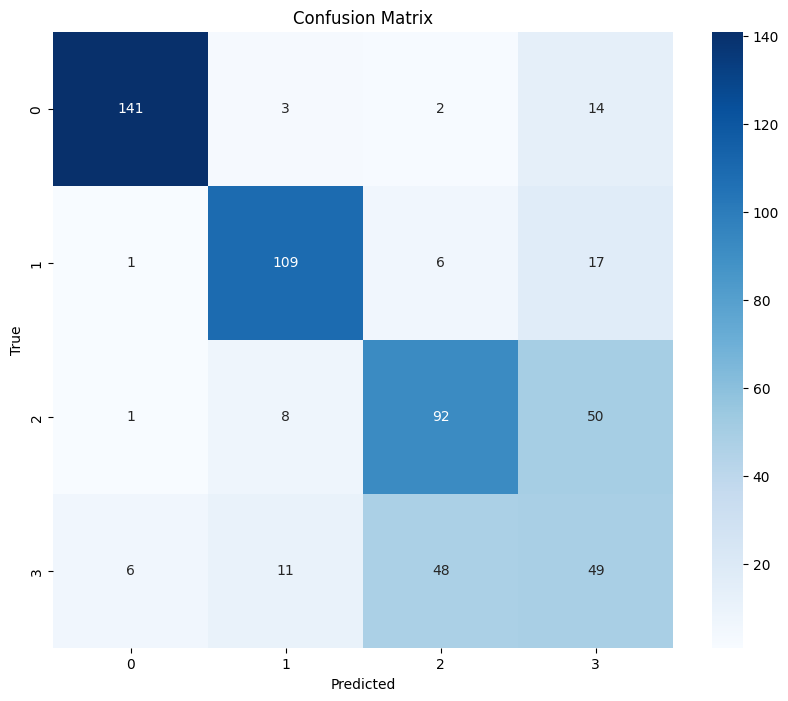

In [21]:
# 1 - country 2 - hip hop 3 - jazz 4 - pop
# y_original_test = label_encoder.inverse_transform(y_test)
# y_original_pred = label_encoder.inverse_transform(y_val_pred)

# cm = confusion_matrix(y_original_test, y_original_pred)

# # Wizualizacja macierzy pomyłek
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
## dalsze wykresy dla xgboost

3